# **Essential Libraries**

In [78]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score, recall_score, f1_score
import tensorflow 
from tensorflow import keras
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# **Training Data**

In [ ]:
df=pd.read_csv(r"/kaggle/input/higgs-dataset/training.csv")

In [5]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [6]:
df['Label'].unique()

array(['s', 'b'], dtype=object)

In [7]:
df.columns 

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [8]:
higgs_df=df.iloc[:,1:]

In [9]:
# s -- signal --> 1 
# b -- background --> 0

In [10]:
higgs_df["Label"]=higgs_df["Label"].apply(lambda x:1 if x=="s" else 0) 

In [11]:
higgs_df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0


In [12]:
weight=higgs_df["Weight"]

In [13]:
weight.shape

(250000,)

# **Multicollinearity Check**

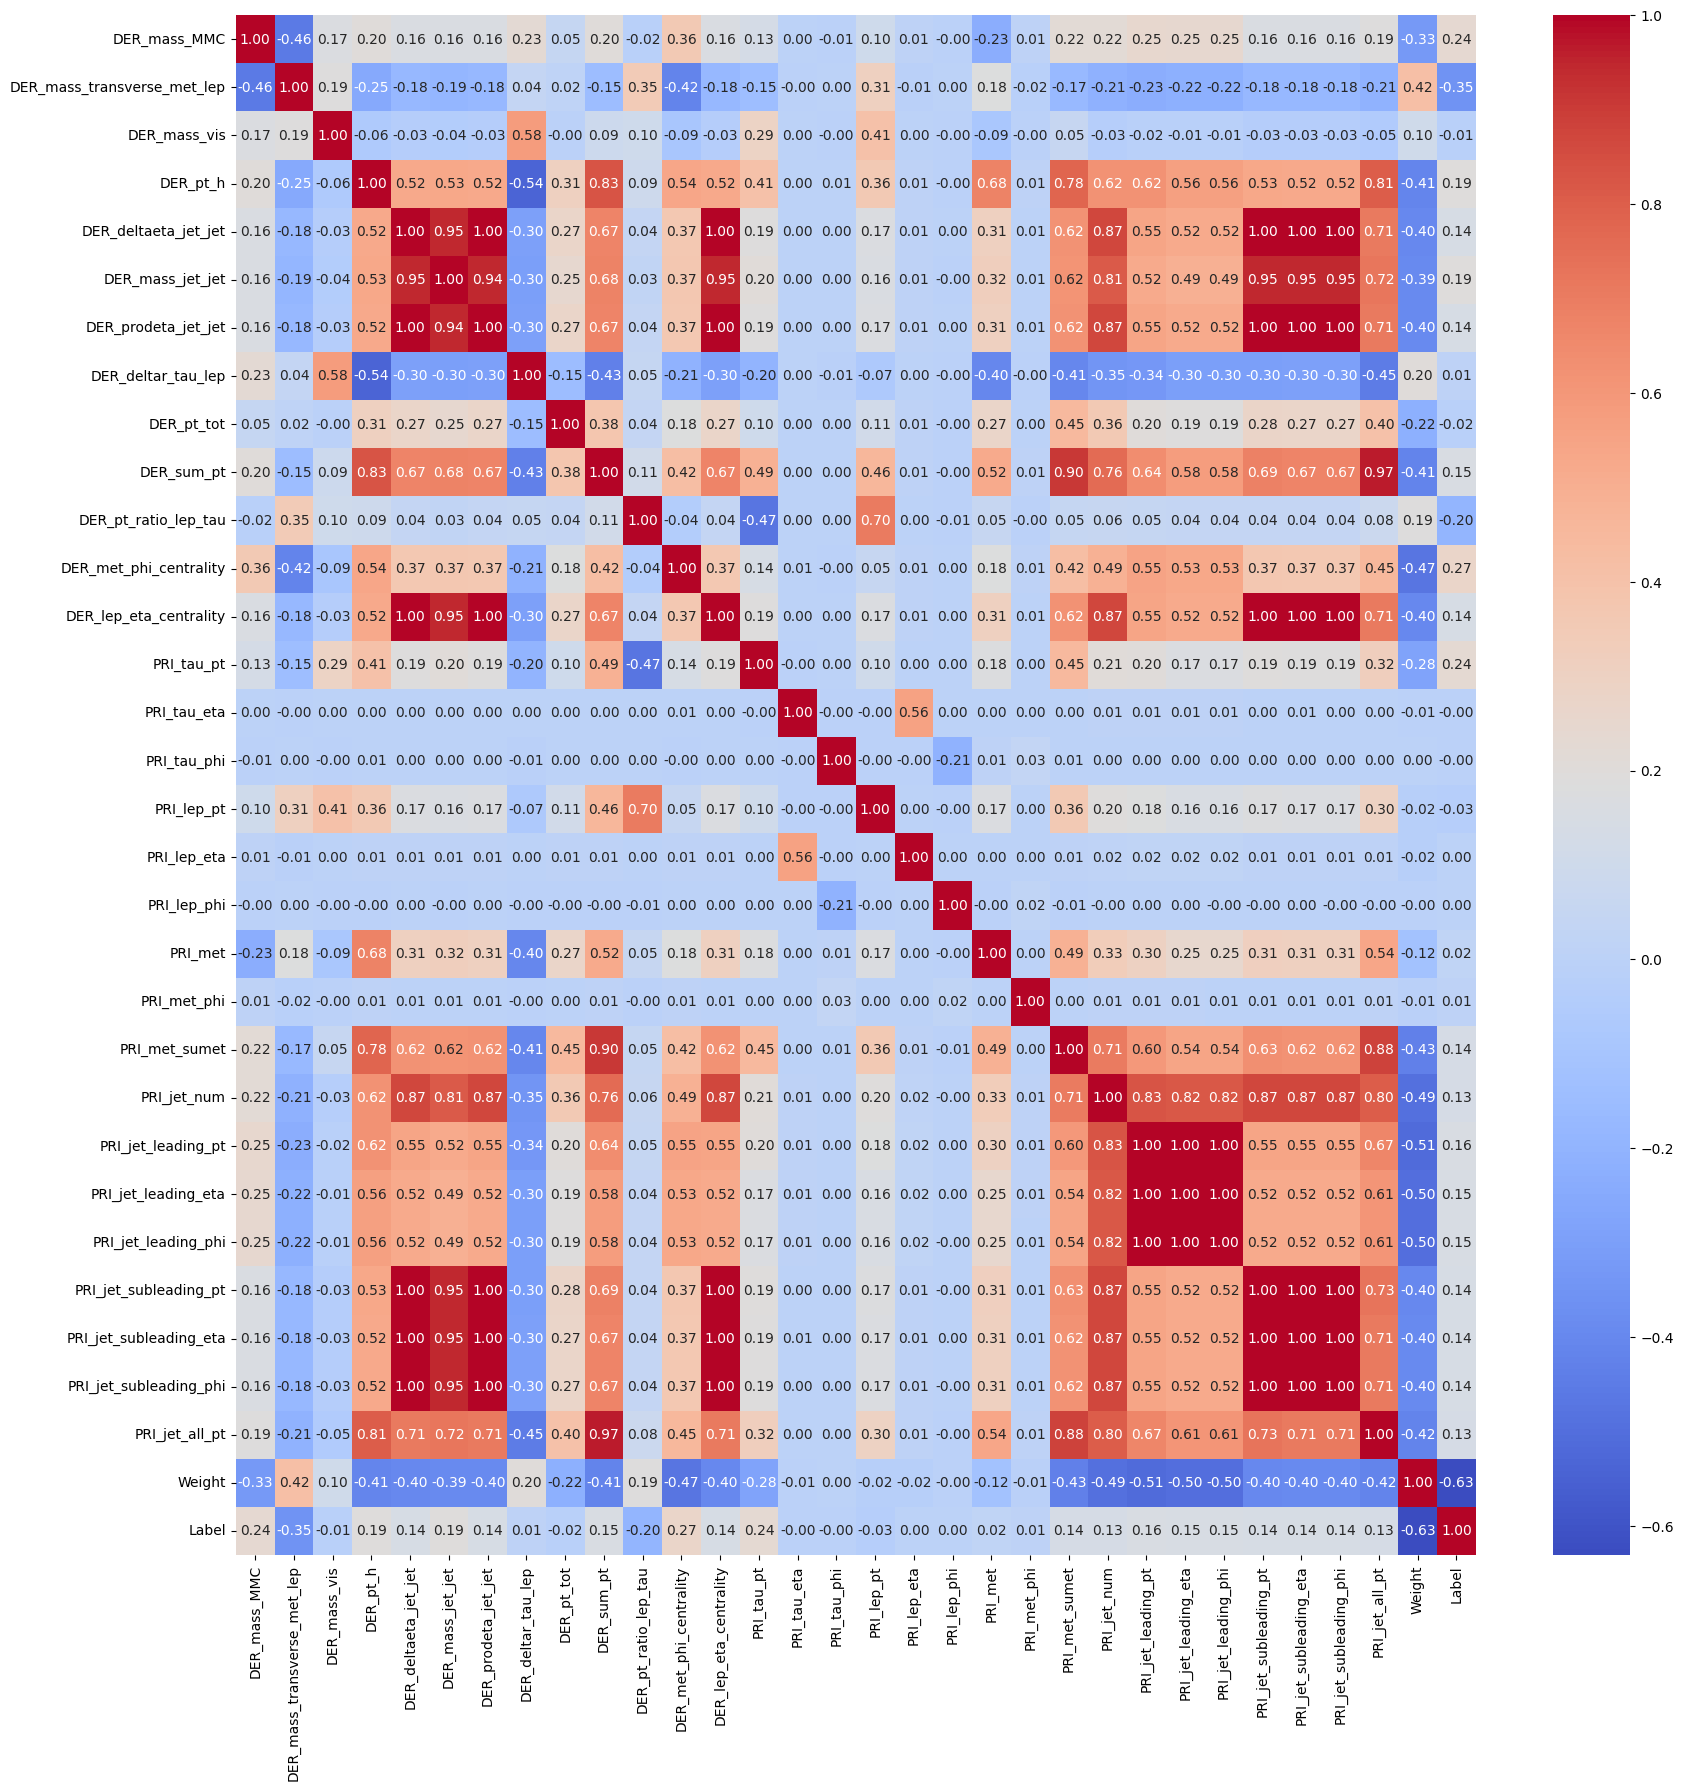

In [14]:
correlation_matrix = higgs_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [15]:
target_corr = higgs_df.corrwith(higgs_df['Label'])
print(target_corr) 

DER_mass_MMC                   0.239149
DER_mass_transverse_met_lep   -0.351428
DER_mass_vis                  -0.014055
DER_pt_h                       0.192526
DER_deltaeta_jet_jet           0.141646
DER_mass_jet_jet               0.191766
DER_prodeta_jet_jet            0.140554
DER_deltar_tau_lep             0.012245
DER_pt_tot                    -0.015287
DER_sum_pt                     0.153236
DER_pt_ratio_lep_tau          -0.195398
DER_met_phi_centrality         0.271752
DER_lep_eta_centrality         0.141346
PRI_tau_pt                     0.235238
PRI_tau_eta                   -0.000943
PRI_tau_phi                   -0.004403
PRI_lep_pt                    -0.031948
PRI_lep_eta                    0.001516
PRI_lep_phi                    0.004125
PRI_met                        0.022466
PRI_met_phi                    0.007475
PRI_met_sumet                  0.135520
PRI_jet_num                    0.133549
PRI_jet_leading_pt             0.157604
PRI_jet_leading_eta            0.150469


In [16]:
X=higgs_df.iloc[:,0:-2]
y=higgs_df.iloc[:,-1]

In [17]:
X=np.array(X)
y=np.array(y)

In [18]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test,weights_train, weights_test=train_test_split(X_scaled,y,weight,random_state=42,test_size=0.2)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(y_train)
print(y_test)

(200000, 30)
(200000,)
[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# **Test Data load**

In [23]:
test=pd.read_csv(r"/kaggle/input/higgs-dataset/test.csv")

In [24]:
test.shape

(550000, 31)

In [25]:
test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [26]:
test_df=test.iloc[:,1:]

# **GradientBoostingClassifier**

AMS Score: 1.1818260122186992
Accuracy on test set: 0.8263
Precision: 0.7746
Recall: 0.6872
F1 Score: 0.7282
Confusion Matrix:
 [[29678  3387]
 [ 5298 11637]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87     33065
           1       0.77      0.69      0.73     16935

    accuracy                           0.83     50000
   macro avg       0.81      0.79      0.80     50000
weighted avg       0.82      0.83      0.82     50000



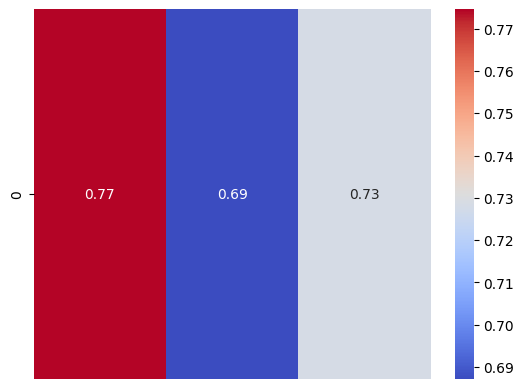

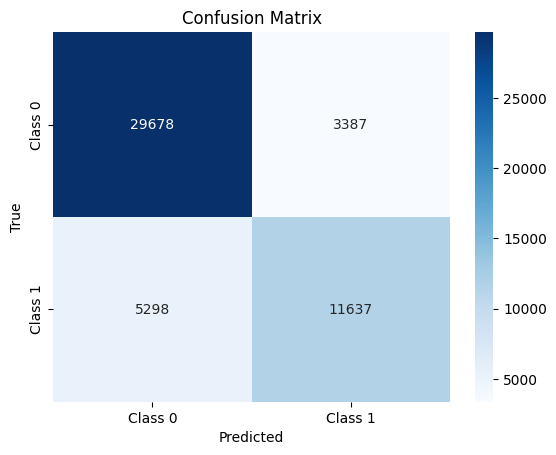

In [48]:
gradient_ba=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=100)

gradient_ba.fit(X_train,y_train)

y_pred=gradient_ba.predict(X_test)

accuracy_ba = accuracy_score(y_test, y_pred)

conf_matrix_ba = confusion_matrix(y_test, y_pred)

class_report_ba = classification_report(y_test, y_pred)

precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test , y_pred)

def calculate_ams(y_true, y_pred, weights):
    s = sum(weights * ((y_true == 1) & (y_pred == 1)))
    b = sum(weights * ((y_true == 0) & (y_pred == 1)))
    br = 10  
    ams = (2 * ((s + b + br) * np.log(1 + s / (b + br)) - s))**0.5
    return ams

ams = calculate_ams(y_test, y_pred, weights_test)

# results
print(f'AMS Score: {ams}')
print(f"Accuracy on test set: {accuracy_ba}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:\n", conf_matrix_ba)
print("\nClassification Report:\n", class_report_ba) 

report_ba=pd.DataFrame({'Precision':[precision],'recall':[recall],"F1 Score":[f1]})

sns.heatmap(report_ba, cmap='coolwarm', annot=True)
plt.xticks([])
plt.show()   

sns.heatmap(conf_matrix_ba, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 

# **Test the Gradient Boosting Algorithm on Unseen Test Data**

In [49]:
test_prediction=gradient_ba.predict(test_df)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [75]:
test_pred_gba=pd.DataFrame({"Test Predictions_From_gba":test_prediction})

In [76]:
test_pred_gba

,Test Predictions_From_gba
0,0
1,0
2,0
3,0
4,0
...,...
549995,0
549996,0
549997,0
549998,0


# **Artificial Neural Network**

In [29]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,445 (99.39 KB)

 Trainable params: 25,445 (99.39 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred=model.predict(X_test)

y_pred=np.array(y_pred)

y_pred=(y_pred>0.5).astype(int)

print(y_pred)

Epoch 1/10
  90/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6815 - loss: 0.5783 

I0000 00:00:1710160255.402879     241 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8079 - loss: 0.4155 - val_accuracy: 0.8199 - val_loss: 0.3952
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8311 - loss: 0.3763 - val_accuracy: 0.8308 - val_loss: 0.3731
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8346 - loss: 0.3703 - val_accuracy: 0.8342 - val_loss: 0.3684
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8342 - loss: 0.3698 - val_accuracy: 0.8334 - val_loss: 0.3682
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8346 - loss: 0.3670 - val_accuracy: 0.8333 - val_loss: 0.3682
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8358 - loss: 0.3670 - val_accuracy: 0.8344 - val_loss: 0.3655
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8371 - loss: 0.3627 - val_accuracy: 0.8359 - val_loss: 0.3625
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8377 - loss: 0.3611 - val

In [39]:
y_pred=y_pred.flatten()

AMS Score: 1.18
accuracy_score: 0.83
Precision: 0.77
Recall: 0.69
F1 Score: 0.73
Confusion Matrix:
 [[29678  3387]
 [ 5298 11637]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87     33065
           1       0.77      0.69      0.73     16935

    accuracy                           0.83     50000
   macro avg       0.81      0.79      0.80     50000
weighted avg       0.82      0.83      0.82     50000



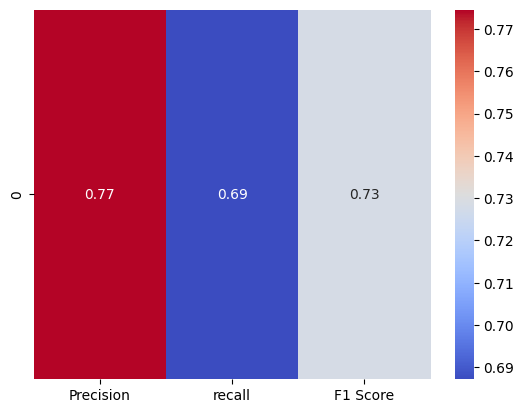

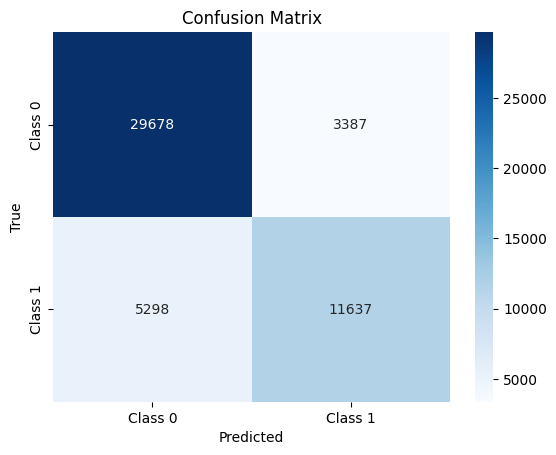

In [77]:
accuracy_score_ann=accuracy_score(y_test,y_pred)

conf_matrix_ann = confusion_matrix(y_test,y_pred)

class_report = classification_report(y_test,y_pred)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

def calculate_ams(y_true, y_pred, weights):
    s = sum(weights * ((y_true == 1) & (y_pred == 1)))
    b = sum(weights * ((y_true == 0) & (y_pred == 1)))
    br = 10  
    ams = (2 * ((s + b + br) * np.log(1 + s / (b + br)) - s))**0.5
    return ams

ams = calculate_ams(y_test, y_pred, weights_test)

# results
print(f'AMS Score: {np.round(ams,2)}')
print(f'accuracy_score: {accuracy_score_ann:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print("Confusion Matrix:\n", conf_matrix_ann)
print("\nClassification Report:\n", class_report) 


data_ann = [precision, recall, f1]

report_ann=pd.DataFrame({'Precision':[precision],'recall':[recall],"F1 Score":[f1]})

sns.heatmap(report_ann, cmap='coolwarm', annot=True)
plt.show()   


sns.heatmap(conf_matrix_ann, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Test the ANN on Unseen Test Data**

In [60]:
test_prediction=model.predict(test_df)

17188/17188 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step


In [67]:
test_prediction=(test_prediction>0.5).astype(int)

In [68]:
test_prediction=test_prediction.flatten()

In [71]:
test_pred_ann=pd.DataFrame({"Test Predictions_From_ANN":test_prediction})

In [72]:
test_pred_ann

,Test Predictions_From_ANN
0,0
1,0
2,0
3,0
4,0
...,...
549995,0
549996,0
549997,0
549998,0
